<a href="https://colab.research.google.com/github/Kamalakp8/ML_Projects/blob/main/NueralNetwork_ClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras

import tensorflow as tf



# Helper libraries

import numpy as np

import matplotlib.pyplot as plt



print(tf.__version__)

2.19.0


In [ ]:
print(dir(tf.keras.datasets))



['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'boston_housing', 'california_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [ ]:
# Importing the mnist dataset

fashion_mnist = tf.keras.datasets.fashion_mnist





# Splitting the dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape





(60000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',

               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

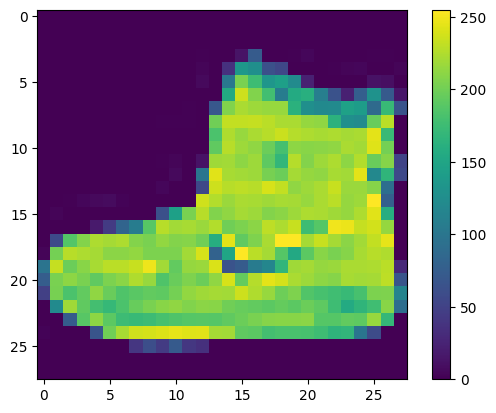

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.imshow(train_images[0])

plt.colorbar()

plt.grid(False)

plt.show()

In [ ]:
train_images = train_images / 255.0



test_images = test_images / 255.0

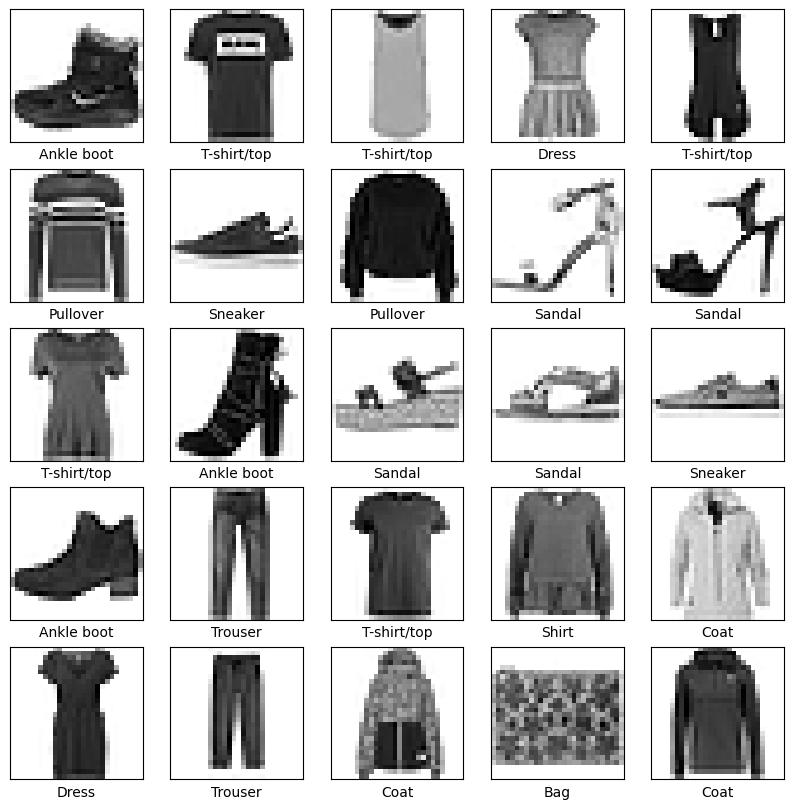

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):

    plt.subplot(5,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
#__________________Prtining the random 5 Images ____________________________________________



# train_images = train_images / 255.0

# test_images = test_images / 255.0

# indexes = np.random.randint(0, train_images.shape[0], size=5)

# images = train_images[indexes]

# labels = train_labels[indexes]

# # plot the 5 images

# for i in range(len(indexes)):

#     # plt.figure(tf.size(images))

#     plt.subplot(2,3, i + 1)

#     image = images[i]

#     plt.imshow(image)

#     plt.colorbar()

#     plt.grid(False)

#     plt.title(f"Label: {labels[i]}")

# plt.show()

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10)

])

In [ ]:
# Inspect dimensions and data type
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Data type: {train_images.dtype}")
print(f"Max pixel value: {train_images.max()}")
print(f"Min pixel value: {train_images.min()}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Data type: uint8
Max pixel value: 255
Min pixel value: 0


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7786 - loss: 0.6378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8588 - loss: 0.3903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8755 - loss: 0.3442
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8861 - loss: 0.3129
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8896 - loss: 0.2937
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.2821
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9015 - loss: 0.2670
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9032 - loss: 0.2589
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9094 - loss: 0.2485
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9105 - loss: 0.2388


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8853 - loss: 0.3354

Test accuracy: 0.8852999806404114


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions[0]

array([8.3708901e-10, 7.0503634e-15, 1.7687792e-11, 4.4885480e-12,
       4.2860164e-09, 2.3421923e-04, 5.0482831e-09, 3.7138383e-03,
       1.5749677e-08, 9.9605191e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

np.int64(9)

In [ ]:
test_labels[0]

np.uint8(9)

In [ ]:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


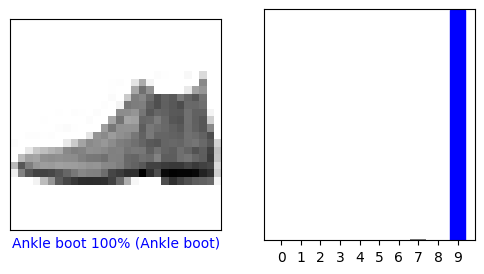

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

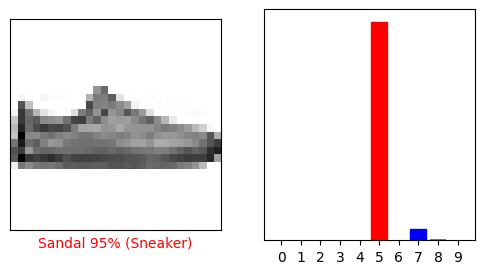

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

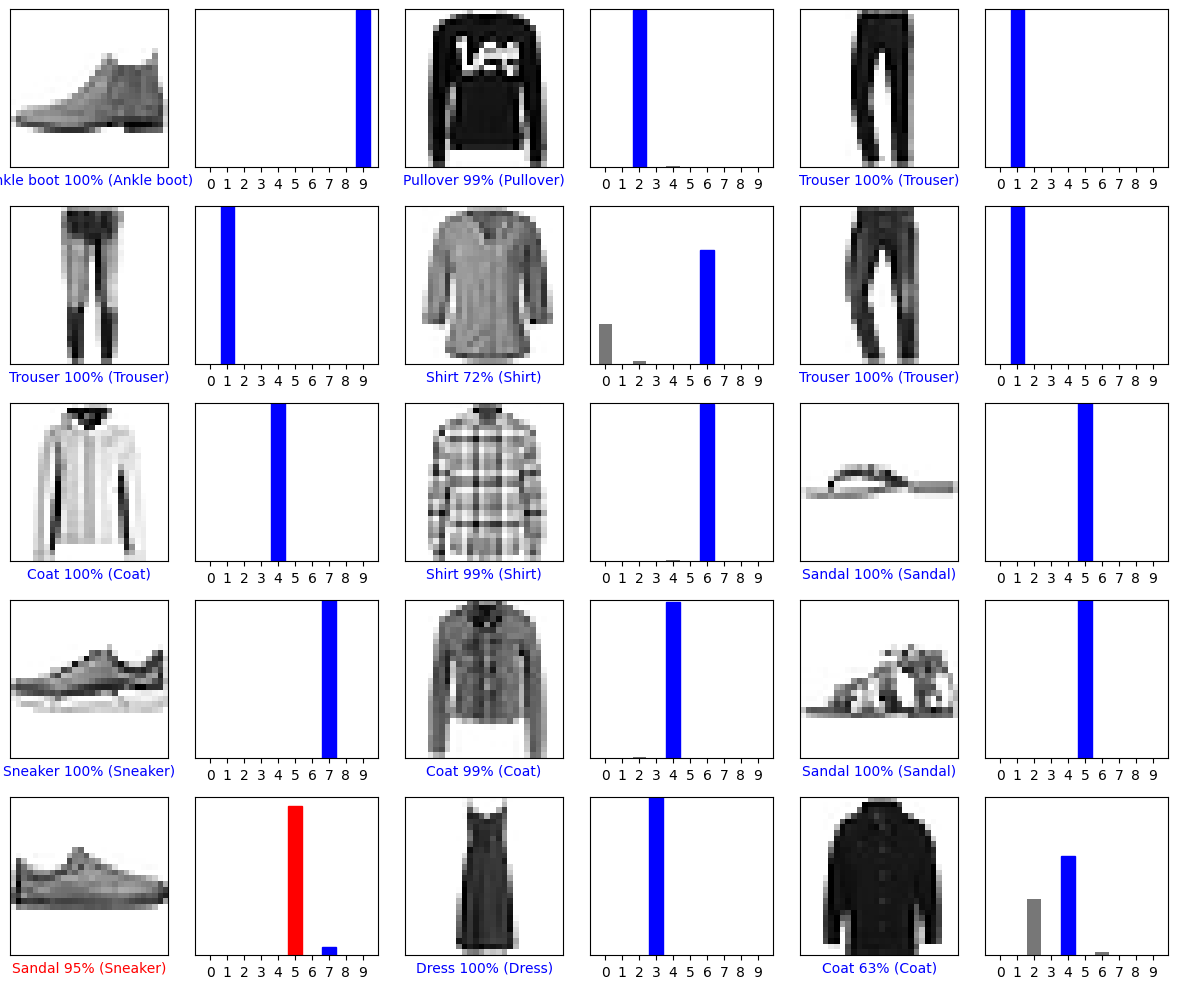

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[1.6190528e-05 9.8125019e-16 9.9235874e-01 1.3316838e-12 7.6015596e-03
  3.2217496e-11 2.3490540e-05 2.6390264e-15 2.0180173e-10 4.2627004e-14]]


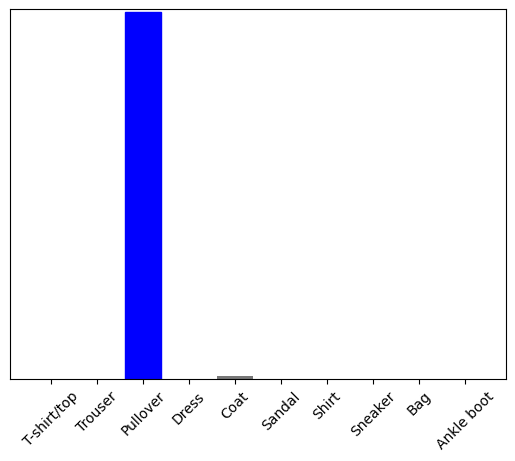

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

np.int64(2)

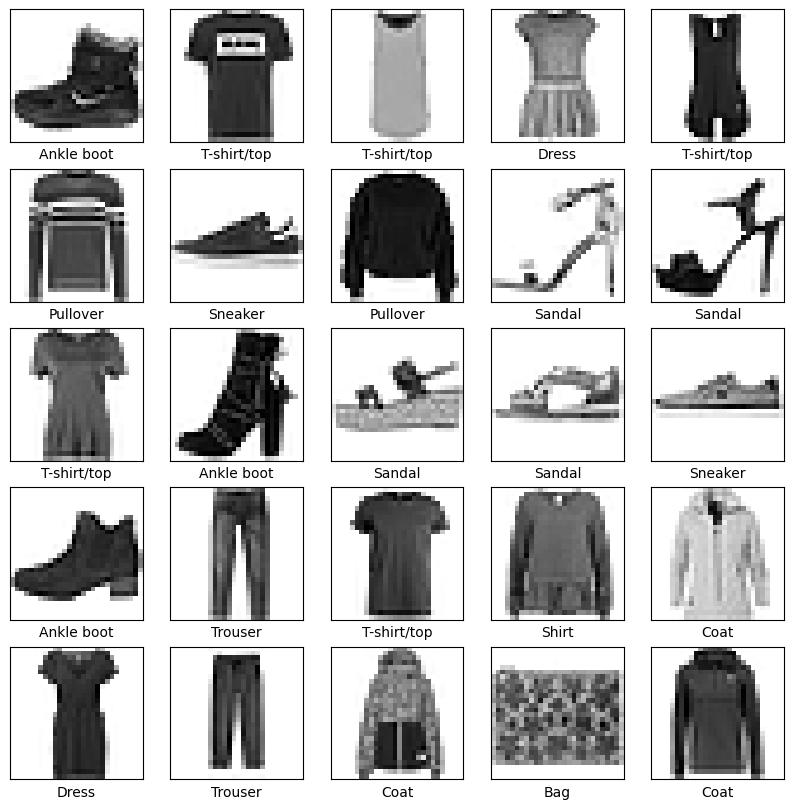

In [ ]:
# Define the class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the image
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Set the label as the title
    plt.xlabel(class_names[train_labels[i]])
plt.show()

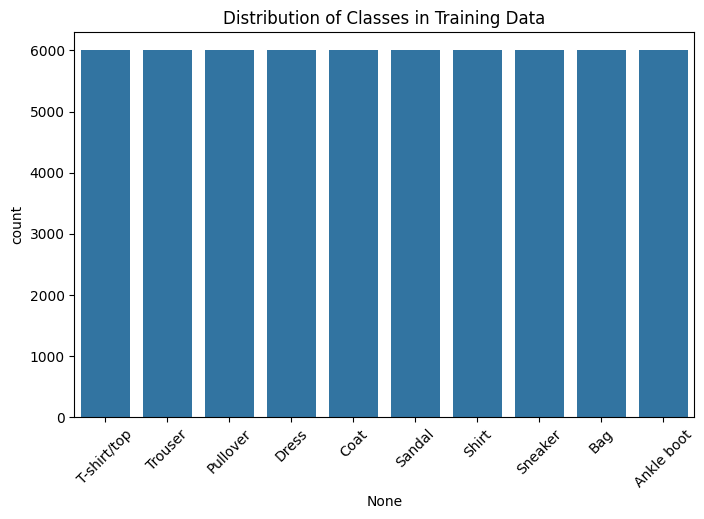

In [ ]:
import seaborn as sns
import pandas as pd

# Create a pandas Series from the labels
label_series = pd.Series(train_labels)

# Plot the count of each class
plt.figure(figsize=(8, 5))
sns.countplot(x=label_series)
plt.title('Distribution of Classes in Training Data')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

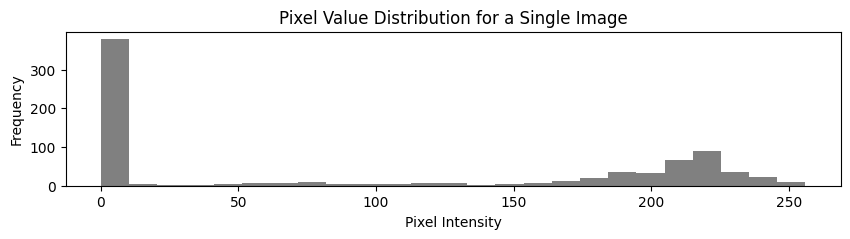

Mean pixel value across all images: 72.94035223214286
Standard deviation across all images: 90.02118235130519


In [ ]:
# Plot a histogram of pixel values for a single image
plt.figure(figsize=(10, 2))
plt.hist(train_images[0].ravel(), bins=25, range=[0, 256], color='gray')
plt.title('Pixel Value Distribution for a Single Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Calculate overall mean and standard deviation of all training images
mean_pixel = np.mean(train_images)
std_pixel = np.std(train_images)

print(f"Mean pixel value across all images: {mean_pixel}")
print(f"Standard deviation across all images: {std_pixel}")